In [1]:
import re
from collections import Counter

# C-like numeric array
import numpy as np

# dealing with table data
import pandas as pd

# a new data viz library
import altair as alt
alt.renderers.enable("notebook")

# from `SongShu.py`
from SongShu import SongShu

# SongShu -- Place Names Export (Part 2)

In the previous notebook, we used regex to capture the sentences with place names in the `ÂäâÂÆãÂú∞ÂêçËàáÂÆòÂêç 2017-11-14.xlsx`. In this notebook, we would use this regex to export a list of place names. And we also list the frequencies the characters attached with these place names.

Tasks:
- **Part 1**: place names regex
- <span class="mark">**Part 2**: export place names (from `"ÂäâÂÆãÂú∞ÂêçËàáÂÆòÂêç 2017-11-14.xlsx"`) and the frequency of characters attached on these place names</span>
- **Part 3**: export natural place names (using "Ê¥≤", "Â±±")

## Export Place Names

First, we repeat the processing we've done in the previous notebook.

In [2]:
# repeat the process

# loading Excel Sheet for place names
place_excel = pd.ExcelFile("../SongShu/SongshuDH/ÂäâÂÆãÂú∞ÂêçËàáÂÆòÂêç 2017-11-14.xlsx")
df_place    = pd.read_excel(place_excel, "Places") # reading the "Places" sheet

# replace the ÈÉ°
df_place.Name = [re.sub(r"(.+)?ÈÉ°", r"\1", name) for name in df_place.Name]

# get an unique set of Names
place_name_set = set(df_place.Name)

# Get the SongShu Text
songshu = SongShu("2018-06-28", "MF")
songshu.load_htmls()

# preprocessing the songshu data to get metadata and bookmarks
# and separate the passages in every pages
songshu.extract_paths()
songshu.extract_meta()
songshu.extract_passages()

# find the match place names in sentences
regex = r"([^„ÄÅ„ÄÇÔºåÔºüÔºÅÔºöÔºõ„Äå„Äç„Äî„Äï„Äé„Äè]+)?({})([^„ÄÅ„ÄÇÔºåÔºüÔºÅÔºöÔºõ„Äå„Äç„Äî„Äï„Äé„Äè]+)?".format(r"|".join(place_name_set))
flat_place_names = []

# a horrible triple loop (lol)
# it takes some times ... since it is a horrible python for loop üò≠
for passages in songshu.flat_passages:
    place_names = []
    for p in passages:
        place_names.append([
            (match.group(1), match.group(2), match.group(3)) 
            for match in re.finditer(regex, p)
        ])
        
    flat_place_names.append(place_names)

# preview the list
# the structure is like
# a sentence: (before the place name, place name, after the place name)        
flat_place_names[0][:2]

[Info] Stop at loading data/ShongShu_0851.html.
[Info] Total length of the data is 851.
[Warning] Not the right indent. Âè≤ÔºèÊ≠£Âè≤ÔºèÂÆãÊõ∏ÔºèÂøó„ÄÄÂá°‰∏âÂçÅÂç∑ÔºèÂç∑‰∫åÂçÅ‰∫å„ÄÄÂøóÁ¨¨ÂçÅ‰∫åÔºèÊ®ÇÂõõ(P.625)..[Â∫ïÊú¨ÔºöÂÆãÂÖÉÊòé‰∏âÊúùÈÅû‰øÆÊú¨]
[Warning] Not the right indent. Âè≤ÔºèÊ≠£Âè≤ÔºèÂÆãÊõ∏ÔºèÂøó„ÄÄÂá°‰∏âÂçÅÂç∑ÔºèÂç∑‰∫åÂçÅ‰∫å„ÄÄÂøóÁ¨¨ÂçÅ‰∫åÔºèÊ®ÇÂõõÔºèÈ≠èÈºìÂêπÊõ≤ÂçÅ‰∫åÁØá„ÄÄÁπÜË•≤ÔºèÂàù‰πãÂπ≥Êõ≤(P.644)..[Â∫ïÊú¨ÔºöÂÆãÂÖÉÊòé‰∏âÊúùÈÅû‰øÆÊú¨]
[Warning] Not the right indent. Âè≤ÔºèÊ≠£Âè≤ÔºèÂÆãÊõ∏ÔºèÂøó„ÄÄÂá°‰∏âÂçÅÂç∑ÔºèÂç∑‰∫åÂçÅ‰∫å„ÄÄÂøóÁ¨¨ÂçÅ‰∫åÔºèÊ®ÇÂõõÔºèÈ≠èÈºìÂêπÊõ≤ÂçÅ‰∫åÁØá„ÄÄÁπÜË•≤ÔºèÊà∞ÊªéÈôΩÊõ≤(P.644)..[Â∫ïÊú¨ÔºöÂÆãÂÖÉÊòé‰∏âÊúùÈÅû‰øÆÊú¨]
[Warning] Not the right indent. Âè≤ÔºèÊ≠£Âè≤ÔºèÂÆãÊõ∏ÔºèÂøó„ÄÄÂá°‰∏âÂçÅÂç∑ÔºèÂç∑‰∫åÂçÅ‰∫å„ÄÄÂøóÁ¨¨ÂçÅ‰∫åÔºèÊ®ÇÂõõÔºèÈ≠èÈºìÂêπÊõ≤ÂçÅ‰∫åÁØá„ÄÄÁπÜË•≤ÔºèÁç≤ÂëÇÂ∏ÉÊõ≤(P.644)..[Â∫ïÊú¨ÔºöÂÆãÂÖÉÊòé‰∏âÊúùÈÅû‰øÆÊú¨]
[Warning] Not the right indent. Âè≤ÔºèÊ≠£Âè≤ÔºèÂÆãÊõ∏ÔºèÂøó„ÄÄÂá°‰∏âÂçÅÂç∑ÔºèÂç∑‰∫åÂçÅ‰∫å„ÄÄÂøóÁ¨¨ÂçÅ‰∫åÔºèÊ®ÇÂõõÔºèÈ≠èÈºìÂêπÊõ≤ÂçÅ‰∫åÁØ

[[(None, 'ÂΩ≠Âüé', 'Á∏£Á∂èËºøÈáå‰∫∫'),
  ('ËæüÂΩäÁîü', 'ÈôΩÂüé', 'ÁπÜ‰æØÂæ∑'),
  ('Âæ∑Áîü', 'ÈôΩÂüé', 'ÁØÄ‰æØÂÆâÊ∞ë'),
  ('ÂÆâÊ∞ëÁîü', 'ÈôΩÂüé', 'Èáê‰æØÊÖ∂Âøå'),
  ('ÊÖ∂ÂøåÁîü', 'ÈôΩÂüé', 'ËÇÖ‰æØÂ≤ë'),
  ('Âπ≥ÁîüÊù±', 'Ê≠¶Âüé', '‰ª§Êüê'),
  ('ÊüêÁîü', 'Êù±Ëêä', 'Â§™ÂÆàÊôØ'),
  ('Ê¥ΩÁîü', 'Âçö', 'Â£´Âºò'),
  ('ÊÇùÁîüÈ≠è', 'ÂÆöË•Ñ', 'Â§™ÂÆàÊüê'),
  ('ËÜ∫Áîü', 'Áõ∏', 'ÂúãÊéæÁÜô'),
  ('Â±ÖÊôâÈôµÈÉ°', '‰∏πÂæí', 'Á∏£‰πã‰∫¨Âè£Èáå'),
  ('ÂÆòËá≥', 'Ê≠¶Âéü', '‰ª§'),
  ('Ê∑∑Áîü', 'Êù±ÂÆâ', 'Â§™ÂÆàÈùñ'),
  ('È´òÁ•ñ‰ª•ÊôâÂìÄÂ∏ù', 'ËààÂØß', 'ÂÖÉÂπ¥Ê≠≤Ê¨°Áô∏‰∫•‰∏âÊúàÂ£¨ÂØÖÂ§úÁîü')],
 [('ÂàùÁÇ∫', 'ÂÜ†Ëªç', 'Â≠´ÁÑ°ÁµÇÂè∏È¶¨'),
  ('Â¶ñË≥äÂ≠´ÊÅ©‰Ωú‰∫ÇÊñº', 'ÊúÉÁ®Ω', None),
  ('Áâ¢‰πãËá≥', 'Âê≥', None),
  ('Âπ≥Â±±', 'Èô∞', None)]]

Writing to a `csv` file. I would keep 2 blank columns for longitude and latitude.

For convenience, I just keep the first of `all_possible_IDs` for `ID`. 

In [3]:
# using indexing! My co-workers would hate me üòÖ
# tuple for the csv file
csv = [ (
    df_place.ID[df_place.Name == sentence[1]].tolist()[0],   # first ID
    sentence[1],           # place name
    None, None,            # lon, lat
    ''.join([s for s in sentence if isinstance(s, str)]),    # The sentence include the tag
    set(df_place.ID[df_place.Name == sentence[1]].tolist()), # all possible IDs, since a place name referring to multiple IDs
    meta['category'],      # category
    meta['scroll'],        # scroll
    meta['title'],         # title
    ) 
    for place_names,meta in zip(flat_place_names, songshu.flat_meta) 
    for place_name in place_names
    for sentence in place_name
] 
# this list comprehension is kind of slooow...

csv[0]

('lsp0102',
 'ÂΩ≠Âüé',
 None,
 None,
 'ÂΩ≠ÂüéÁ∏£Á∂èËºøÈáå‰∫∫',
 {'lsp0102', 'lsp0139', 'lsp3030'},
 'Êú¨Á¥Ä',
 'Âç∑‰∏Ä',
 'Ê≠¶Â∏ù\u3000ÂäâË£ï\u3000‰∏ä(P.1)')

Making a DataFrame

In [4]:
df_export_csv = pd.DataFrame(
    csv, 
    columns=['ID', 'Place_Name', 'lon', 'lat', 
             'sentence', 'all_possible_IDs', 
             'category', 'scroll', 'title']
)
df_export_csv.head()

ID Place_Name   lon   lat   sentence             all_possible_IDs  \
0  lsp0102         ÂΩ≠Âüé  None  None    ÂΩ≠ÂüéÁ∏£Á∂èËºøÈáå‰∫∫  {lsp0102, lsp0139, lsp3030}   
1  lsp0191         ÈôΩÂüé  None  None   ËæüÂΩäÁîüÈôΩÂüéÁπÜ‰æØÂæ∑                    {lsp0191}   
2  lsp0191         ÈôΩÂüé  None  None   Âæ∑ÁîüÈôΩÂüéÁØÄ‰æØÂÆâÊ∞ë                    {lsp0191}   
3  lsp0191         ÈôΩÂüé  None  None  ÂÆâÊ∞ëÁîüÈôΩÂüéÈáê‰æØÊÖ∂Âøå                    {lsp0191}   
4  lsp0191         ÈôΩÂüé  None  None   ÊÖ∂ÂøåÁîüÈôΩÂüéËÇÖ‰æØÂ≤ë                    {lsp0191}   

  category scroll         title  
0       Êú¨Á¥Ä     Âç∑‰∏Ä  Ê≠¶Â∏ù„ÄÄÂäâË£ï„ÄÄ‰∏ä(P.1)  
1       Êú¨Á¥Ä     Âç∑‰∏Ä  Ê≠¶Â∏ù„ÄÄÂäâË£ï„ÄÄ‰∏ä(P.1)  
2       Êú¨Á¥Ä     Âç∑‰∏Ä  Ê≠¶Â∏ù„ÄÄÂäâË£ï„ÄÄ‰∏ä(P.1)  
3       Êú¨Á¥Ä     Âç∑‰∏Ä  Ê≠¶Â∏ù„ÄÄÂäâË£ï„ÄÄ‰∏ä(P.1)  
4       Êú¨Á¥Ä     Âç∑‰∏Ä  Ê≠¶Â∏ù„ÄÄÂäâË£ï„ÄÄ‰∏ä(P.1)

In [5]:
# saving dataframe
df_export_csv.to_csv("SongShu_placeTags_lonlat.csv")

In [6]:
# export a list of place names with comma separation 
with open("SongShu_placeTags.txt", "w", encoding="utf-8") as file:
    for place_name in set(df_export_csv.Place_Name):
        file.write("{}, ".format(place_name))

## Frequency of Characters Attached with Place Names

- 1 char before place name
- 1 char after place name
- 2 char before place name
- 2 char after place name

In [7]:
df_sentence_tuples = pd.DataFrame(
    [tup for place_names in flat_place_names for place_name in place_names for tup in place_name],
    columns=['before_tag', 'tag', 'after_tag']
)

df_sentence_tuples.head()

before_tag tag after_tag
0       None  ÂΩ≠Âüé     Á∏£Á∂èËºøÈáå‰∫∫
1        ËæüÂΩäÁîü  ÈôΩÂüé       ÁπÜ‰æØÂæ∑
2         Âæ∑Áîü  ÈôΩÂüé      ÁØÄ‰æØÂÆâÊ∞ë
3        ÂÆâÊ∞ëÁîü  ÈôΩÂüé      Èáê‰æØÊÖ∂Âøå
4        ÊÖ∂ÂøåÁîü  ÈôΩÂüé       ËÇÖ‰æØÂ≤ë

### Top 20 freq char before place names.

[('ÁÇ∫', 1292), ('Â±¨', 649), ('Âçó', 575), ('Áéã', 433), ('Êñº', 369), ('Âè≤', 365), ('Â∏ù', 316), ('‰πã', 316), ('Ëá≥', 297), ('‰ª•', 289), ('Â∞Å', 281), ('Ëªç', 251), ('Ë¶ã', 245), ('ÈÉ°', 226), ('Êúâ', 207), ('Â∑û', 194), ('ÈéÆ', 192), ('Âú®', 192), ('Êù±', 186), ('Âπ≥', 165)]


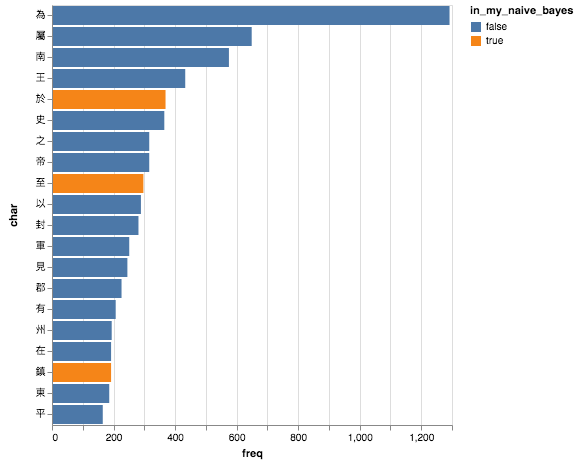

In [8]:
# freq of one char before
# remember to remove None
counter = Counter( 
    [tag[-1] for tag in df_sentence_tuples.before_tag if tag != None] 
).most_common(20)

print(counter)

# Altair plotting
data = pd.DataFrame(
    {'char' : [char for char, freq in counter],
    'freq' : [freq for char, freq in counter],
    'in_my_naive_bayes' : [char in "Ëá≥‰∫éÊñºÂêëÁ†¥Â•îÈéÆÂÖ•ÂæÅ" for char, freq in counter]
    }
)
alt.Chart(data).mark_bar().encode(
    x='freq',
    y=alt.Y('char', sort=alt.SortField(field="freq", op="sum", order="descending")), 
    color='in_my_naive_bayes'
)

### Top 20 freq chars after place names.

[('Áéã', 1323), ('Âà∫', 1143), ('‰ª§', 1106), ('Â§™', 831), ('Á∏£', 674), ('ÈÉ°', 634), ('‰πã', 581), ('Ëªç', 487), ('Â∞á', 432), ('Â∑û', 345), ('‰∫å', 286), ('‰∫∫', 284), ('ÈñÄ', 270), ('Âúã', 253), ('ÊÅ≠', 235), ('Á´ã', 209), ('ÁÜô', 205), ('Â∫∑', 196), ('ÂÆ£', 193), ('Âπ≥', 192)]


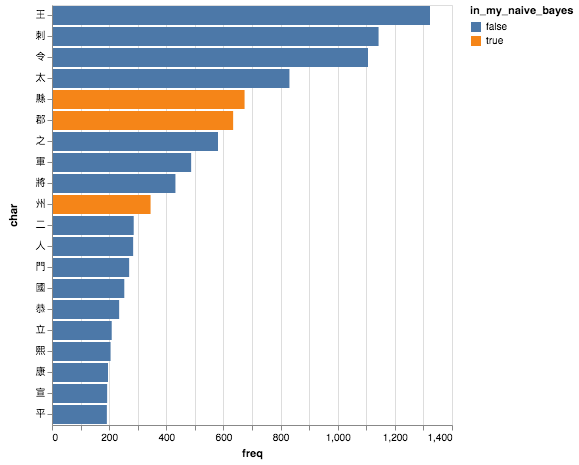

In [9]:
# freq of one char before
# remember to remove None
counter = Counter( 
    [tag[0] for tag in df_sentence_tuples.after_tag if tag != None] 
).most_common(20)

print(counter)

# Altair plotting
data = pd.DataFrame(
    {'char' : [char for char, freq in counter],
    'freq' : [freq for char, freq in counter],
    'in_my_naive_bayes' : [char in "ÈÑâÂ∏ÇÁ∏£ÈéÆÈÉ°ÂüéÂ∑û" for char, freq in counter]
    }
)
alt.Chart(data).mark_bar().encode(
    x='freq',
    y=alt.Y('char', sort=alt.SortField(field="freq", op="sum", order="descending")), 
    color='in_my_naive_bayes'
)

What??? What happens to `"‰∫å"`?

In [10]:
# preview some sample
[''.join([btag,tag,atag]) for btag,tag,atag in zip(df_sentence_tuples.before_tag, 
                           df_sentence_tuples.tag, 
                           df_sentence_tuples.after_tag) 
     if (atag != None and btag != None and tag != None)
     if atag[0] == '‰∫å'][::10] 

['ÂçóÁß¶‰∫åÂ∑ûÂà∫Âè≤',
 'ÂçóÁß¶‰∫åÂ∑ûÂà∫Âè≤',
 'ÂçóÁß¶‰∫åÂ∑ûÂà∫Âè≤',
 'ÂçóÁß¶‰∫åÂ∑ûÂà∫Âè≤',
 'Â∏ùÈå´‰∫åÁ•ñ',
 'Êº¢Ê°ìÂ∏ùÊ∞∏Ëàà‰∫åÂπ¥ÂõõÊúà',
 'Âê≥Â≠´‰∫ÆÂª∫Ëàà‰∫åÂπ¥',
 'ÊôâÂÖÉÂ∏ùÊ∞∏Êòå‰∫åÂπ¥‰∏ÉÊúà‰∏ôÂ≠êÊúî',
 'Êù±‰∫¨ÂÖÜ‰∫åÂÉëÈÉ°',
 'ÊôâÂìÄÂ∏ùËààÂØß‰∫åÂπ¥',
 'Â∑¥Ë•øÊ¢ìÊΩº‰∫åÈÉ°Â§™ÂÆà',
 'Ë•ÑÈôΩÊñ∞Èáé‰∫åÈÉ°Â§™ÂÆà',
 'Ê¢ÅÂçóÁß¶‰∫åÂ∑ûÂà∫Âè≤',
 'ÂçóÂΩ≠Âüé‰∏ãÈÇ≥‰∫åÈÉ°Â§™ÂÆà',
 'ÂÖóÂæê‰∫åÂ∑ûÂà∫Âè≤',
 'ÂçóÁêÖÈÇ™Ê≥∞Â±±‰∫åÈÉ°Â§™ÂÆà',
 'ÂâçÊ±ùÂçóÊΩÅÂ∑ù‰∫åÈÉ°Â§™ÂÆàÈæêÂ§©Áîü',
 'ÂçóÊ≤õ‰∫åÈÉ°Â§™ÂÆàÂäâÊá∑‰πãÁéá‰∫∫Ê∞ë‰∏ÄÊôÇÊ∏°Ê±ü']

OK, it makes sense. "‰∫å" means ‰∫åÈÉ° ÔºàÂêåÊôÇÂÖ©ÂÄãÈÉ°Ôºâ or ‰∫åÂ∑û or some mistakes tagging on time names.

### Top 20 two chars before place names

In [11]:
# loading ÂÆòÂêç
df_bureaucracy = pd.read_excel(place_excel, "Offices")

[('Âà∫Âè≤', 325), ('Â∞áËªç', 160), ('Êº¢Â±¨', 138), ('Â§èÁéã', 128), ('ÂøóÂ±¨', 116), ('ÁÇ∫Âçó', 86), ('Âá∫ÁÇ∫', 84), ('Â§™ÂÆà', 76), ('‰ª•ÁÇ∫', 70), ('ÂüéÁéã', 64), ('‰πãÁÇ∫', 61), ('ÂÆâÂ∏ù', 56), ('ÁêÜÁîü', 56), ('Ë≠ôÁéã', 44), ('‰∫åÂ∑û', 44), ('Â∑ùÁéã', 43), ('ÊñáÂ∏ù', 42), ('Âê≥Ëàà', 41), ('ÁêÖÈÇ™', 40), ('ÊîπÂ∞Å', 40)]


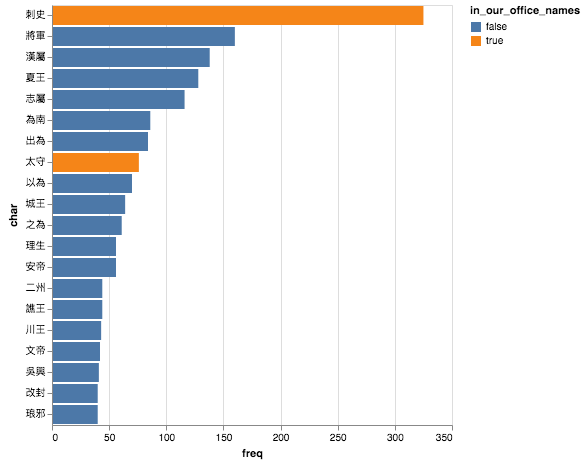

In [12]:
# freq of one char before
# remember to remove None
counter = Counter( 
    [tag[-2:] for tag in df_sentence_tuples.before_tag if tag != None if len(tag[-2:]) == 2] 
).most_common(20)

print(counter)

# Altair plotting
data = pd.DataFrame(
    {'char' : [char for char, freq in counter],
    'freq' : [freq for char, freq in counter],
     'in_our_office_names' : [char in df_bureaucracy.Name.values for char,freq in counter]
    }
)
alt.Chart(data).mark_bar().encode(
    x='freq',
    y=alt.Y('char', sort=alt.SortField(field="freq", op="sum", order="descending")), 
    color='in_our_office_names'
)

I am curious about `"Â§èÁéã"`:

In [13]:
[''.join([btag,tag,atag]) for btag,tag,atag in zip(df_sentence_tuples.before_tag, 
                           df_sentence_tuples.tag, 
                           df_sentence_tuples.after_tag) 
     if (atag != None and btag != None and tag != None)
     if btag[-2:] == 'Â§èÁéã'][::10]

['ËçäÂ∑ûÂà∫Âè≤Ê±üÂ§èÁéãÁæ©ÊÅ≠ÁÇ∫ÂæÅÂåóÂ∞áËªç',
 'Â§™ÂÆ∞Ê±üÂ§èÁéãÁæ©ÊÅ≠Âä†‰∏≠Êõ∏Áõ£',
 'ÈåÑÂ∞öÊõ∏Ê±üÂ§èÁéãÁæ©ÊÅ≠Á≠âÂçÅ‰∫å‰∫∫Á´ãË≠∞Âêå',
 'ÂòâÁ¶æ‰∫åÊ†™ÁîüÊ±üÂ§èÁéãÁæ©ÊÅ≠Êù±Áî∞',
 'Âπ∏Â§™ÂÆ∞Ê±üÂ§èÁéãÁæ©ÊÅ≠Á¨¨',
 'ÂèàÈô§Ê±üÂ§èÁéãÁæ©ÊÅ≠È©ÉÈ®é‰∏≠ÂÖµÂèÉËªç',
 'Ê±üÂ§èÁéãÁæ©ÊÅ≠Â§™Â∞âË°åÂèÉËªç',
 'Â∏∏ËàáÊ±üÂ§èÁéãÁæ©ÊÅ≠ÂØ¢È£ü‰∏çÈõ¢ÊñºÂÅ¥',
 'Ê±üÂ§èÁéãÁæ©ÊÅ≠ÁÇ∫ÂæÅÂåóÂ∞áËªç',
 'ÂèàÁÇ∫Ê±üÂ§èÁéãÁæ©ÊÅ≠Â§™Â∞âÂèÉËªç',
 'ÂèàÂà•Ë©îÂ§™ÂÆ∞Ê±üÂ§èÁéãÁæ©ÊÅ≠Êõ∞',
 'Ê±üÂ§èÁéãÁæ©ÊÅ≠',
 'Ê±üÂ§èÁéãÁæ©ÊÅ≠‰ª•Â§™‰øùÈ†òÂ§ßÂÆóÂ∏´']

So, all of these are wrong. Apparently, single char place name, like "Áæ©", has high probability to be wrong. Note: [ÂäâÁæ©ÊÅ≠](https://zh.wikipedia.org/wiki/%E5%8A%89%E7%BE%A9%E6%81%AD)

### Top 20 two chars after place names

[('Âà∫Âè≤', 1142), ('Â§™ÂÆà', 791), ('Â∞áËªç', 342), ('Ëªç‰∫ã', 340), ('Â∑ûÂà∫', 192), ('ÁéãÂ≠ê', 162), ('Áéã‰ºë', 155), ('ÊñáÂ∏ù', 126), ('ÈÉ°Â§™', 116), ('‰∫∫‰πü', 116), ('ÂÖÉÂπ¥', 107), ('Á∏£‰æØ', 105), ('ÈñÄ‰æç', 104), ('‰∫åÈÉ°', 92), ('ÂÖßÂè≤', 86), ('ÁéãË™ï', 68), ('ÁéãÊø¨', 64), ('ÊòéÂ∏ù', 63), ('‰∫åÂπ¥', 62), ('ËààÂ§™', 58)]


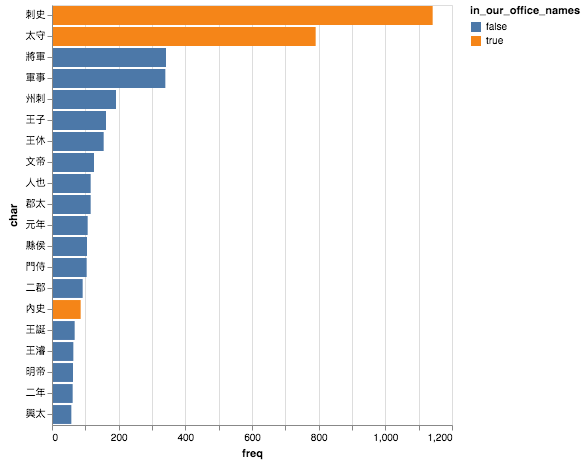

In [14]:
# freq of one char before
# remember to remove None
counter = Counter( 
    [tag[:2] for tag in df_sentence_tuples.after_tag if tag != None if len(tag[:2]) == 2] 
).most_common(20)

print(counter)

# Altair plotting
data = pd.DataFrame(
    {'char' : [char for char, freq in counter],
    'freq' : [freq for char, freq in counter],
    'in_our_office_names' : [char in df_bureaucracy.Name.values for char,freq in counter]
    }
)
alt.Chart(data).mark_bar().encode(
    x='freq',
    y=alt.Y('char', sort=alt.SortField(field="freq", op="sum", order="descending")), 
    color='in_our_office_names'
)

It seems some time chars are wrongly assigned as place names.

I would STOPüõë here. There are further more Altair interactive plots to be explored. We can try to deal with embedding Altair plots in the `.html` next time.

### (Supplementary) Encoding freq of a chars after and before tags as X-Y axis

In [15]:
# counting freq of 1 char before and after the place names
counter_before = Counter( 
    [tag[-1:] for tag in df_sentence_tuples.before_tag if tag != None] 
)

counter_after  = Counter( 
    [tag[:1] for tag in df_sentence_tuples.after_tag if tag != None] 
)

# making {char : (freq before tag, freq after tag)} form
before_after_pairs = {}

for char,freq in counter_before.items():
    try:
        before_after_pairs[char] = (freq, counter_after[char])
    except IndexError as e:
        before_after_pairs[char] = (freq, 0)
        
for char,freq in counter_after.items():
    if char not in before_after_pairs.keys():
        before_after_pairs[char] = (0, freq)

len(before_after_pairs)

2425

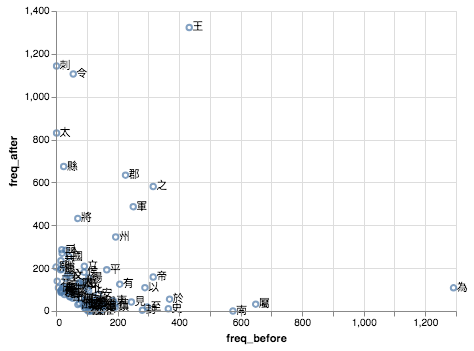

In [16]:
# cut-off the small numbers (sum of the pair of the freqs is small)
data = pd.DataFrame({ char : pair
    for char, pair in before_after_pairs.items()
    if sum(pair) > 100
    }, index=['freq_before', 'freq_after']).T

chart = alt.Chart(data.reset_index()).mark_point().encode(
    x='freq_before',
    y='freq_after',
)

text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='index'
)

chart + text

Make it cleaner

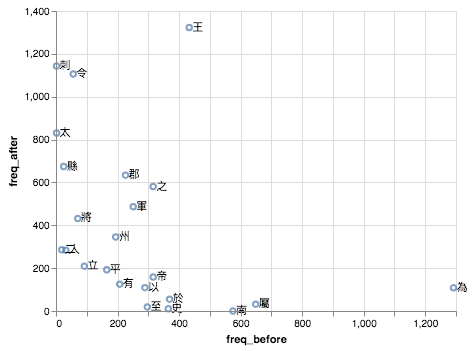

In [17]:
# cut-off the small numbers (sum of the pair of the freqs is small)
data = pd.DataFrame({ char : pair
    for char, pair in before_after_pairs.items()
    if sum(pair) > 300
    }, index=['freq_before', 'freq_after']).T

chart = alt.Chart(data.reset_index()).mark_point().encode(
    x='freq_before',
    y='freq_after',
)

text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='index'
)

chart + text